# Ultralytics


![ultralytics](./images/ultralytics.png)

[Ultralytics](https://docs.ultralytics.com/) 是一个非常实用的 Python 库，用于使用或训练 YOLO 模型。虽然其官方文档非常优秀，但我们仍将在此介绍两个 YOLO 模型。你知道吗？这个库还能运行 [SAM](https://segment-anything.com/)（即 *Segment Anything* 分割模型）！


## YOLO


面对众多 YOLO 模型（如 YOLOv4、YOLOv5、YOLO-NAS 等），很容易让人感到困惑。我的建议是：亲自动手测试一下！由于这些模型的作者不同，很难直接断言哪个模型是最佳选择。


### [YOLOv8](https://sh-tsang.medium.com/review-yolov8-object-detection-5214fa105731)


对于大多数 YOLO 模型（YOLO-World 除外），模型加载和推理的方式是相同的。
在 [YOLOv8 官方文档](https://docs.ultralytics.com/models/yolov8/#performance-metrics) 中，你会发现有多个可选模型。

![yolov8 模型示意图](./images/yolov8.png)


YOLOv8 不仅限于目标检测！它还能实现以下功能：
- [语义分割](https://docs.ultralytics.com/tasks/segment/)
- [姿态估计](https://docs.ultralytics.com/tasks/pose/)（检测图像中人物的位置和骨骼结构）
- [方向目标检测](https://docs.ultralytics.com/fr/tasks/obb/#visual-samples)（支持旋转的 *bounding box*）
- [图像分类](https://docs.ultralytics.com/tasks/classify/#export)


在本教程中，我们将重点介绍一个目标检测的示例。

首先，你需要下载一个模型。模型的选择取决于你的计算资源和对速度的需求。一般来说，模型越大，性能越好，但速度也越慢。


Prenons le modèle le plus rapide, yolov8n.
Voici comment le charger avec la bibliothèque Ultralytics :


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# On charge le modèle pre-entrainé YOLOv8n
model = YOLO("yolov8n.pt")

# Affiche les informations du modèle
model.info()

# On fait une prédiction sur une image
results = model("images/coco.jpg")

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco.jpg: 448x640 6 persons, 2 cars, 1 backpack, 3 handbags, 5 cell phones, 79.1ms
Speed: 1.1ms preprocess, 79.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


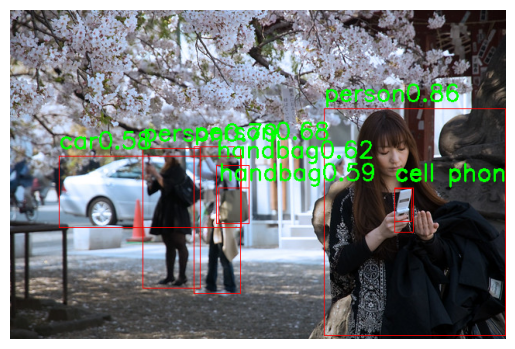

In [2]:
# Seuil de détection
threshold=0.5
# Les noms des classes
names={0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
image=cv2.imread("images/coco.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#Conversion de l'image en RGB
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

En quelques lignes de code, on a pu utiliser le modèle YOLOv8 !


### [YOLO-World](https://arxiv.org/pdf/2401.17270)


YOLO-World 是 YOLO 的最新版本，支持 *开放词汇* 检测。旧版本通常在特定类别上训练（如 [COCO 数据集](https://cocodataset.org/#home) 的 80 个类别），因此需要重新训练或微调以适应其他类别。而 YOLO-World 则能检测任意类别，只需在输入图像时提供文本提示即可。

![yoloworld 示意图](./images/yoloworld.png)


使用 YOLO-World 的方法与其他 YOLO 模型几乎相同，唯一区别是需要添加文本 *提示（prompt）*。


In [3]:
# On charge le modèle pre-entrainé YOLOv8s-world
model = YOLO("yolov8s-worldv2.pt") 

# On définit les classes du modèle
model.set_classes(["person", "surfboard"])
names={0: 'person', 1: 'surfboard'}

# On fait une prédiction sur notre image
results = model.predict("images/coco2.jpg")


image 1/1 /Users/simonthomine/Documents/CoursDeepLearning/08_WIP_DetectionEtYolo/images/coco2.jpg: 640x384 2 persons, 1 surfboard, 155.2ms
Speed: 2.6ms preprocess, 155.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 384)


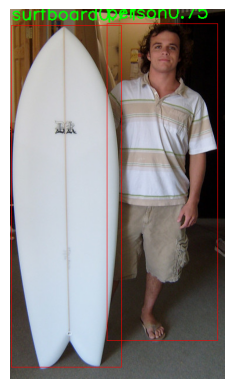

In [4]:
# Seuil de détection
threshold=0.5
# Les noms des classes
image=cv2.imread("images/coco2.jpg")
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences=results[0].boxes.conf.cpu().numpy()
labels=results[0].boxes.cls.cpu().numpy()
# Affichage des résultats
for box,conf,label in zip(boxes,confidences,labels):
    box = box.astype(int)
    if conf>threshold:
        x1, y1, x2, y2 = box[:4]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1) 
        cv2.putText(image, names[label]+str(conf)[:4], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

On détecte bien la personne et la planche de surf.


## Segment Anything (SAM)


[SAM](https://segment-anything.com/) 是一个分割模型，能够分割任意对象。我们曾在 [第 6 课 HuggingFace](../06_HuggingFace/README.md) 中使用过它。你也可以通过 Ultralytics 库来使用它，选择权在你！

以下是在 Python 中使用 Ultralytics 调用 SAM 的方法：


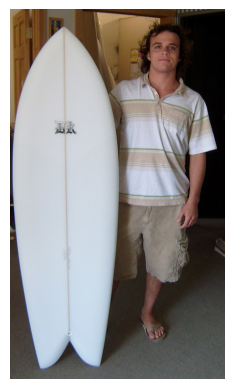

In [5]:
from PIL import Image
raw_image = Image.open("images/coco2.jpg")
plt.imshow(raw_image)
plt.axis('off')
plt.show()


我们使用的是 FastSAM，这是 SAM 的加速版本。你可以通过此 [链接](https://docs.ultralytics.com/models/fast-sam/#available-models-supported-tasks-and-operating-modes) 下载模型权重。


In [6]:
from ultralytics import FastSAM

resized_image=raw_image.resize((1024,1024))
model = FastSAM('./FastSAM-s.pt')

In [7]:
results = model(resized_image,retina_masks=True)


0: 640x640 30 objects, 292.8ms
Speed: 4.2ms preprocess, 292.8ms inference, 199.2ms postprocess per image at shape (1, 3, 640, 640)


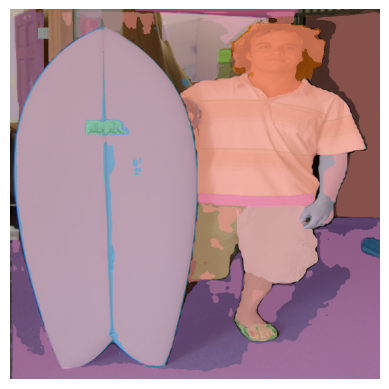

In [39]:
import numpy as np

def draw_masks(image,masks):
    image_np = np.array(image)
    plt.cm.get_cmap('tab20', 38)
    colors = plt.cm.get_cmap('tab20', 38)
    for i, mask in enumerate(masks):
        color = colors(i)[:3] 
        color = tuple(int(c * 255) for c in color) 
        mask =mask.data.squeeze().numpy()>0.5
        image_np[mask] = image_np[mask] * 0.5 + np.array(color) * 0.5       
    return image_np

image_np = draw_masks(resized_image,results[0].masks)
plt.imshow(image_np)
plt.axis('off')
plt.show()

分割结果一般，但这是 FastSAM 中最小的模型，速度非常快（你可以与第 6 课 Hugging Face 中 Notebook 2 的处理时间进行对比）。

**注意**：你还可以使用点、框或文本作为 *提示*（详情请参阅 [文档](https://docs.ultralytics.com/models/fast-sam/#predict-usage)）。


现在，你已经学会如何使用 Ultralytics 库进行快速图像检测和分割了！
